# Fourier Series of simple curves

This notebook shows how to transform a (closed) curve into a Fourier series.

### Content
1. [Prerequisites](#prerequisites)
2. [Some Theory: Fourier Series](#theory)
3. [Computing the Fourier coefficients](#computing_coefficients)
    1. [Straight Lines](#straight_lines)
        1. [Proof](#straight_lines_proof)
        2. [Implementation](#straight_lines_implementation)
        3. [Example](#straight_lines_example)
    2. [Arcs](#arcs)
        1. [Proof](#arcs_proof)
        2. [Implementation](#arcs_implementation)
        3. [Example](#arcs_example)

In [1]:
%matplotlib inline

# Initial imports
import numpy as np
import matplotlib.pyplot as plt

## Prerequisites <a id='prerequisites'></a>
Let's assume we have a curve consisting segments from the following types:
- Straight Lines
- Arcs
- Bezier Curves

We might add further types of segments, later. Currently, these are exactly the types of segments, an SVG path consists of, which we will later use as source for the curve.

Such a curve can be seen as piecewise function $f:[0,2\pi]\to\mathbb{C}$ where the 2D-point of the curve are represented as complex numbers. Given $m$ pieces, there exist function $f_1,\ldots,f_m$ of these pieces and border points $t_0,\ldots,t_m$, $0=t_0 < t_1 < \ldots < t_m = 2\pi$ so that

$$
f(t) = f_i(t)\,\text{ for }\,t\in[t_{i-1},t_i[
$$

For the sake of simplicity, we further assume for the moment that the curve is continuous and closed, i.e. 
- all pieces $f_i$ are continuous, 
- the pieces are connected: $f_i(t_i) = f_{i+1}(t_i)$,
- and the curve starts where it ends: $f(0) = f(2\pi)$

## Some Theory: Fourier Series <a id='theory'></a>
Given a integrable function $f:[0,2\pi]\to\mathbb{C}$, the Fourier series of $f$ is defined by its finite subsequences:

$$\hat{f}_n(t) = \sum_{k=-n}^n c_ke^{ikt},\quad t\in[0,2\pi]$$

with Fourier coefficients

$$c_k := \frac{1}{2\pi}\int_0^{2\pi}f(t)e^{ikt}dt$$

__Note:__ There is not guarentee, that $\hat{f}_n$ converges in the general case and if it converges, it does not necessarily converge against $f$.  
Luckily, (pointwise) convergence is guarenteed for continuous almost always differentiable functions. In case of our continuous piecewise function with differential pieces, this condition is met.

## Computing the Fourier coefficients <a id='computing_coefficients'></a>
In order to compute the Fourier coefficients we need to solve aboves integrals for the pieces over an interval $[t_{i-1}, t_i[$. This will be done in the following.

### Straight lines <a id='straight_lines'></a>
A straight line $g$ from point $p_1$ to point $p_2$, defined over the interval $[a,b]$, is given by

$$
    g(t) = p_1\frac{b-t}{b-a} + p_2\frac{t - a}{b - a}
$$

Using this, we can compute the contribution of a straight line segment to the Fourier coefficients of our piecewise functions:

_Case 1:_ $k=0$:  
$$ 
    \int_a^b g(t)e^{ikt}dt = \frac{1}{2}\left(p_1 + p_2)(b - a)\right)
$$

_Case 2:_ $k\neq 0$:  
$$ 
    \int_a^b g(t)e^{ikt}dt = \frac{ie^{ika}}{k} p_1
           -\frac{ie^{ikb}}{k}p_2
           +\frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)
$$

#### Proof: <a id='straight_lines_proof'></a>
We can rewrite $g$ as:
$$
g(t) = \frac{p_1b - p_2a}{b-a} + t\frac{p_2-p_1}{b-a}
$$

Using this, we can compute the integral as:  
_Case 1:_ $k=0$:  
$$ 
\begin{align*}
    \int_a^b g(t)e^{ikt}dt &= \int_a^b g(t)dt \\
        &= \frac{p_1b - p_2a}{b-a}\left(b-a\right) + \frac{p_2-p_1}{b-a}\frac{1}{2}\left(b^2-a^2\right)\\
        &= \left(p_1b - p_2a\right) + \frac{1}{2}\left(p_2-p_1\right)\left(a+b\right)\\
        &= \frac{1}{2}\left(p_1b - p_2a + p_2b - p_1a\right)\\
        &= \frac{1}{2}\left(p_1 + p_2)(b - a)\right)
\end{align*}
$$

_Case 2:_ $k\neq 0$:  
$$
\begin{align*}
    \int_a^b g(t)e^{ikt}dt &= \int_a^b \left(\frac{p_1b - p_2a}{b-a} + t\frac{p_2-p_1}{b-a}\right)e^{ikt}dt\\
        &= \frac{p_1b - p_2a}{b-a} \int_a^b e^{ikt}dt + \frac{p_2-p_1}{b-a}\int_a^b te^{ikt}dt\\
        &= \frac{p_1b - p_2a}{b-a} \left[\frac{e^{ikt}}{ik}\right]_{t=a}^b + \frac{p_2-p_1}{b-a}\left(\left[\frac{te^{ikt}}{ik}\right]_{t=a}^b-\int_a^b \frac{e^{ikt}}{ik}dt\right)\\
        &= -\frac{i}{k}\frac{p_1b - p_2a}{b-a} \left(e^{ikb}-e^{ika}\right) - \frac{i}{k}\frac{p_2-p_1}{b-a}\left(be^{ikb}-ae^{ika}\right) + \frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)\\
        &= \frac{e^{ika}}{b-a} \frac{i}{k}\left(p_1b - p_2a + p_2a - p_1a\right) - \frac{e^{ikb}}{b-a} \frac{i}{k}\left(p_1b - p_2a + p_2b - p_1b\right) + \frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)\\
        &= \frac{ie^{ika}}{k} p_1 -\frac{ie^{ikb}}{k}p_2 +\frac{1}{k^2}\frac{p_2-p_1}{b-a}\left(e^{ikb}-e^{ika}\right)
\end{align*}
$$

#### Implementation <a id='straight_lines_implementation'></a>
Beginning with a single staight line segment

In [2]:
def transform_straight_line(p1, p2, k, a, b):
    i = 1j   # Just for shorter notations
    
    k = np.asarray(k)
    result = np.zeros(shape=k.shape, dtype=np.complex)
    
    # Handle Case k != 0
    k_ = k[k!=0]
    result[k!=0] = i * np.exp(i*k_*a) * p1 / k_ \
           - i * np.exp(i*k_*b) * p2 / k_ \
           + (p2 - p1) * (np.exp(i*k_*b) - np.exp(i*k_*a)) / (k_*k_*(b - a))
    
    # Handle case k=0
    result[k==0] = (p1 + p2) * (b - a) / 2
    
    # Return results
    return result

Extending this to closed sequences of lines.

_Note:_ There are different ways to termine the segment-borders $t_0,\ldots,t_m$. Here we use the length of the lines.

In [3]:
def transform_polygon(p, n):
    m = len(p)   # Number of Segments (if we close the path)
    
    # Close the curve: add the beginning point at the end
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]
    
    # Length of the segments
    l = np.abs(p[1:] - p[:-1])
    
    # Compute t_0 to t_m based on the lengths with t_0 = 0 and t_m = 2\pi
    t = l.cumsum() / l.sum()
    t = 2 * np.pi * np.concatenate([[0], t])
    
    # get vector of k
    k = np.arange(-n,n+1)
    
    c = sum([transform_straight_line(p[i], p[i+1], k, t[i], t[i+1]) for i in range(m)])
    
    return c, k


Get the fourier approximation as a function.  
This will be used to plot the fourier approximation.

In [4]:
def get_fourier_fct(c, k):
    # Reshape the fourier coefficients row vectors
    c = np.reshape(c, (1,-1))
    k = np.reshape(k, (1,-1))
    
    def fct(t):
        # Reshape the input values into a column vector
        t = np.reshape(t, (-1,1))
        
        return np.sum(c * np.exp(1j * k * t), axis=1) / (2 * np.pi)
    
    return fct

#### Example: Triangle <a id='straight_lines_example'></a>
Works also with other polygones, just add or modify points.

In [5]:
# Corner points of the triangle as complex numbers
p = [-1 -1j,
     0.5 + 3j,
     12
    ]

In [6]:
N = 12

# Compute coefficients c_{-N} to c_N
c,k = transform_polygon(p, N)

# Get approximations (limited to different values n=1,...,N)
fcts = [get_fourier_fct(c[np.abs(k) <= n], k[np.abs(k) <= n]) for n in range(1,N+1)]

Plotting the results

In [7]:
# plot closed curve of complex 
def plotcc(p, *args, **kwargs):
    # close curve
    m = len(p)
    p = np.reshape(p, (-1))
    p = p[list(range(m)) + [0]]
    
    # Complex to real x and y vectors
    x, y = np.real(p), np.imag(p)
    
    plt.plot(x, y, *args, **kwargs)

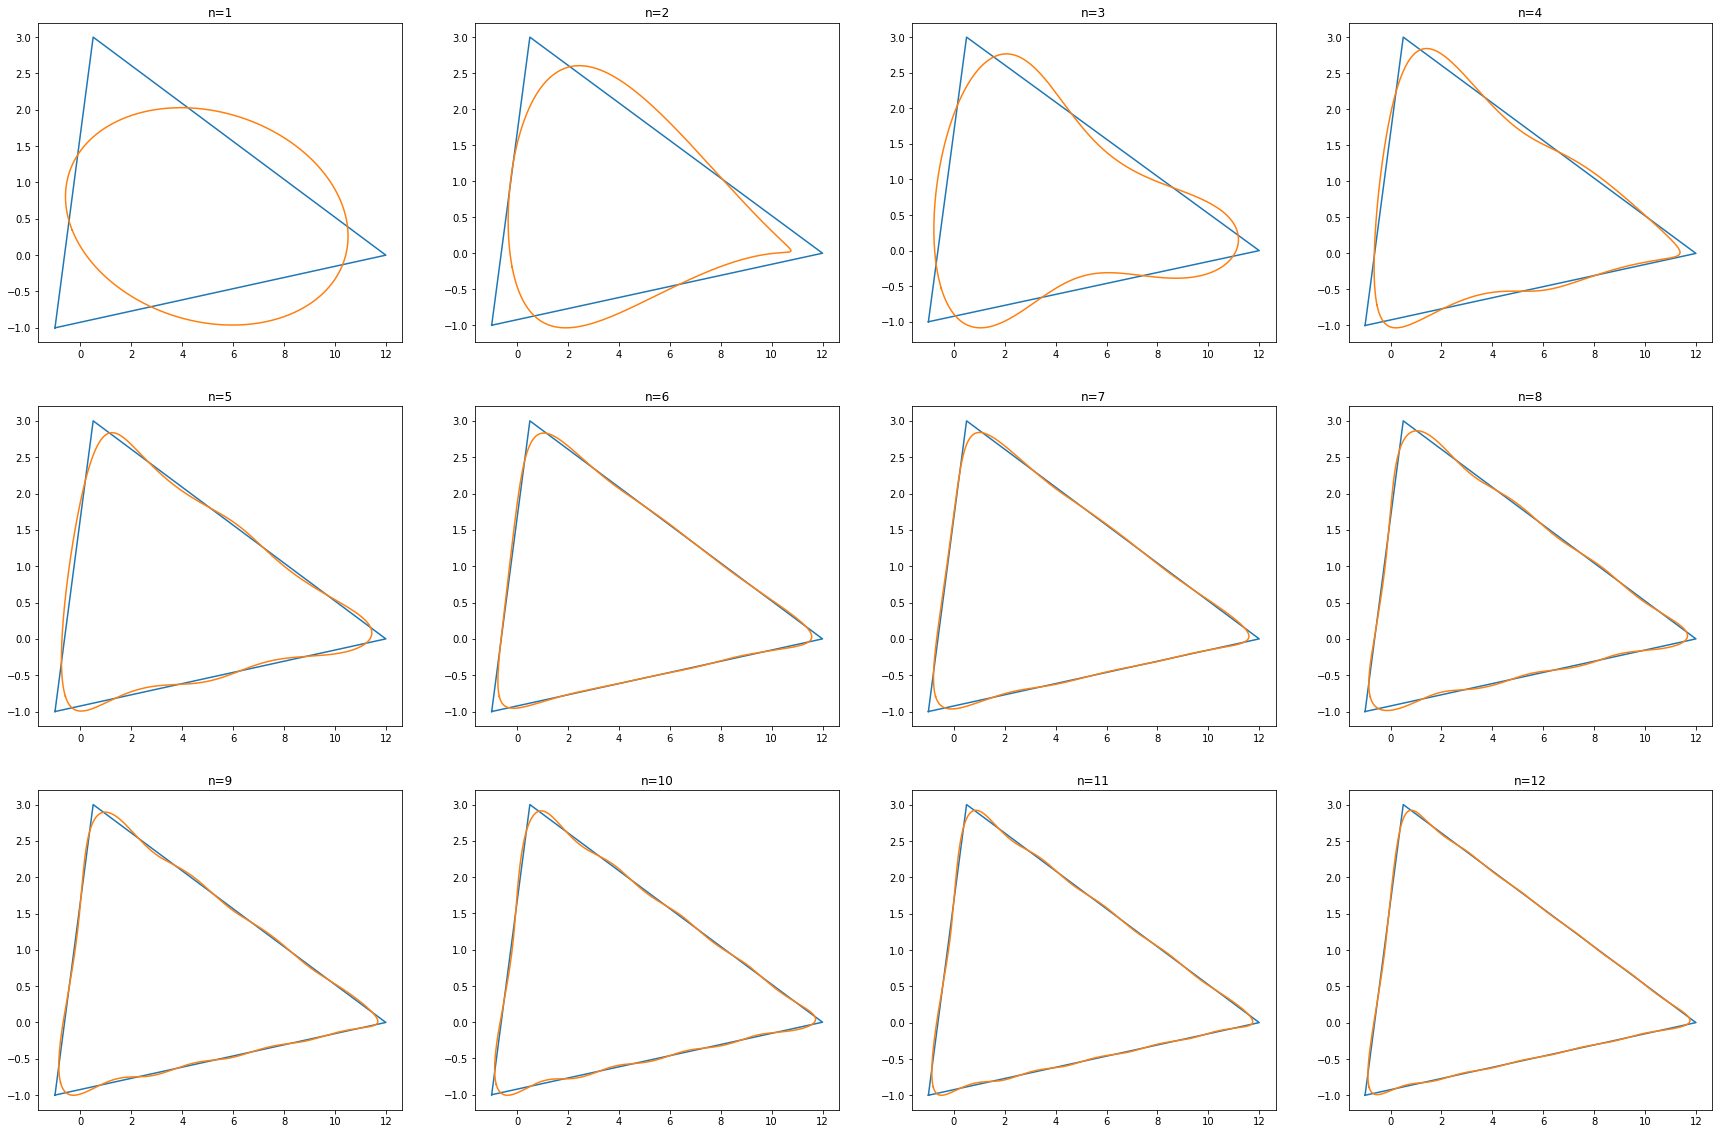

In [8]:
plt.figure(figsize=(30,20))

# Number of points
nT = 1000

t = 2 * np.pi * np.arange(0,1, 1/nT)

for n in range(1, N+1):
    pf = fcts[n-1](t)
    
    plt.subplot(3,4,n)
    plotcc(p)
    plotcc(pf)
    plt.title(f"n={n}")

plt.show()

### Arcs <a id='arcs'></a>
An arc of an ellipse can be parameterized by the following values:
- The center $p\in\mathbb{C}$ of the ellipse
- The radius $r_1\in\mathbb{R}$ along the first axis of the ellipse
- The radius $r_2\in\mathbb{R}$ along the second axis of the ellipse
- The angle $\phi$ of the rotation of the first axis relative to the $x$-axis (or real axis of the complex plain)
- The starting angles $\theta_1$ and the end angle $\theta_2$ of the arc

A arc function $g$ defined over the interval $[a,b]$ can then be written as:

$$
    g(t) = p + e^{i\phi}\left(r_1\cos\theta(t) + r_2i\sin\theta(t)\right)
$$

with

$$
    \theta(t) = \theta_1 + \frac{t - a}{b - a}\left(\theta_2 - \theta_1\right)
$$

Using this, we can compute the contribution of an arc segment over $[a,b]$ to the Fourier coefficients of a piecewise functions as:
$$
\begin{align*}
    \int_a^b g(t)e^{ikt}dt &= p\cdot S_{a,b}\left(ik\right)+ 
    \frac{r_1+r_2}2e^{i\left(\phi+\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(ik+i\frac{\theta_2 - \theta_1}{b - a}\right)+ 
    \frac{r_1-r_2}2e^{i\left(\phi-\theta_1 + \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(ik-i\frac{\theta_2 - \theta_1}{b - a}\right)\\
    S_{a,b}\left(\lambda\right) &= \int_a^be^{\lambda t}dt = \left\{\begin{array}{ll}(b-a) & \text{if }\lambda = 0\\\frac{e^{\lambda b}-e^{\lambda a}}{\lambda}&\text{if }\lambda \neq 0\end{array}\right.
\end{align*}
$$


#### Proof: <a id='arcs_proof'></a>
One can rewrite $g$ as:
$$
\begin{align*}
    g(t) &= p + e^{i\phi}\left(r_1\cos\theta(t) + r_2i\sin\theta(t)\right) \\
         &= p + e^{i\phi}\left(\frac{r_1+r_2}{2}e^{i\theta(t)} + \frac{r_1-r_2}{2}e^{-i\theta(t)}\right) \\
         &= p + \frac{r_1+r_2}{2}e^{i(\phi + \theta(t))} + \frac{r_1-r_2}{2}e^{i(\phi - \theta(t))}
\end{align*}
$$

and $\theta$ as
$$
    \theta(t) = \theta_1 + \frac{t - a}{b - a}\left(\theta_2 - \theta_1\right) = \left(\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right) + \frac{\theta_2 - \theta_1}{b - a}t
$$

Using this, the integral can be rewritten as:

$$
\begin{align*}
    \int_a^b g(t)e^{ikt} dt &= \int_a^b pe^{ikt} dt + \frac{r_1+r_2}2\int_a^b e^{i(\phi + \theta(t)+kt)}dt+ \frac{r_1-r_2}2\int_a^b e^{i(\phi - \theta(t)+kt)}dt\\
    &= p\int_a^b e^{ikt} dt + 
    \frac{r_1+r_2}2e^{i\left(\phi+\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right)}\int_a^b e^{i\left(k+\frac{\theta_2 - \theta_1}{b - a}\right)t}dt+ 
    \frac{r_1-r_2}2e^{i\left(\phi-\theta_1 + \frac{\theta_2 - \theta_1}{b - a}a\right)}\int_a^b e^{i\left(k-\frac{\theta_2 - \theta_1}{b - a}\right)t}dt\\
    &= p\cdot S_{a,b}\left(ik\right)+ 
    \frac{r_1+r_2}2e^{i\left(\phi+\theta_1 - \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(ik+i\frac{\theta_2 - \theta_1}{b - a}\right)+ 
    \frac{r_1-r_2}2e^{i\left(\phi-\theta_1 + \frac{\theta_2 - \theta_1}{b - a}a\right)}\cdot S_{a,b}\left(ik-i\frac{\theta_2 - \theta_1}{b - a}\right)
\end{align*}
$$



#### Implementation <a id='arcs_implementation'></a>
Implementation of the integral of the exponential $S_{a,b}(\lambda)=\int_a^be^{\lambda t}dt$  
The function allows to process multiple values of $\lambda$ at once.

In [9]:
def exp_int(l, a, b):
    
    l = np.asarray(l)
    result = np.zeros(shape=l.shape, dtype=np.complex)
    
    # Handle Case l != 0
    l_ = l[l!=0]
    result[l!=0] = (np.exp(l_*b) - np.exp(l_*a)) / l_
    
    # Handle case l=0
    result[l==0] = b - a
    
    # Return results
    return result

Putting together the integral of an arc segment

In [10]:
def transform_arc(p, r1, r2, phi, theta1, theta2, k, a, b):
    i = 1j   # Just for shorter notations
    
    k = np.asarray(k)
    
    # Compute summand 1
    s1 = p * exp_int(i*k, a, b)
    
    # Compute summand 2
    e2 = i * (phi + theta1 - (theta2-theta1) / (b - a) * a)
    l2 = i * k + i * (theta2-theta1) / (b - a)
    s2 = (r1+r2) / 2 * np.exp(e2) * exp_int(l2, a, b)
    
    # Compute summand 3
    e3 = i * (phi - theta1 + (theta2-theta1) / (b - a) * a)
    l3 = i * k - i * (theta2-theta1) / (b - a)
    s3 = (r1-r2) / 2 * np.exp(e3) * exp_int(l3, a, b)
    
    # Return the sum of all three
    return  s1 + s2 + s3

When performing the fourier transformation on a closed sequences of arcs, we need to compute the lengths of arcs to find the individual bordes $[a,b]$ of the segments. Unfortunatly, elliptic integrals do not have a closed form. Hence we just approximate the length.

In [11]:
def len_of_arc(r1, r2, theta1, theta2, delta_theta=np.pi/180):
    # Number of interpolation points
    if theta2 < theta1:
        theta1, theta2 = theta2, theta1
    
    n = np.ceil((theta2 - theta1) / delta_theta)
    
    # Adjust delta_theta to get equidistant thetas
    delta_theta = (theta2 - theta1) / n
    
    # Compute angles for arc length interpolation
    theta = np.arange(theta1, theta2 + delta_theta / 2, delta_theta)
    
    z = r1 * np.cos(theta) + r2 * 1j * np.sin(theta)
    diff = z[1:] - z[:-1]
    
    L = np.abs(diff).sum()
    
    return L

Fourier series of piecewise arcs.

In [12]:
def transform_piecewise_arcs(p, r1, r2, phi, theta1, theta2, n):
    # Number of pieces
    m = len(p)
    
    l = [len_of_arc(r1[i], r2[i],theta1[i],theta2[i]) for i in range(m)]
    l = np.asarray(l)
    
    # Compute t_0 to t_m based on the lengths with t_0 = 0 and t_m = 2\pi
    t = l.cumsum() / l.sum()
    t = 2 * np.pi * np.concatenate([[0], t])
    
    # get vector of k
    k = np.arange(-n,n+1)
    
    c = sum([transform_arc(p[i], r1[i], r2[i], phi[i], theta1[i], theta2[i], k, t[i], t[i+1]) for i in range(m)])
    
    return c, k
    
    

#### Example: Flower <a id='arcs_example'></a>

In [13]:
# Center Circle of the flower
r = 4

p = [0]
r1 = [r]
r2 = [r]
phi = [0]
theta1 = [0]
theta2 = [2 * np.pi]

# Petals
n_petals = 9      # Number of Petals
d = 3             # Longest distance of the petals to the circle

# Iterate over the Petals
for i in range(n_petals):
    # Connection points with the center circle
    p0 = r * np.exp(2j * i * np.pi / n_petals)
    p1 = r * np.exp(2j * (i + 1) * np.pi / n_petals)
    
    # Center is in the middle
    center = (p0 + p1) / 2
    
    # Rotation: second axis connects p0 and p1
    phi_ = (2*i + 1) * np.pi / n_petals
    r2_ = np.abs(center - p0)
    r1_ = r - np.abs(center) + d
    
    # Append arc
    p.append(center)
    r1.append(r1_)
    r2.append(r2_)
    phi.append(phi_)
    theta1.append(-np.pi/2)
    theta2.append(np.pi/2)

In [14]:
N = 20

# Compute coefficients c_{-N} to c_N
c,k = transform_piecewise_arcs(p, r1, r2, phi, theta1, theta2, N)

# Get approximations (limited to different values n=1,...,N)
fcts = [get_fourier_fct(c[np.abs(k) <= n], k[np.abs(k) <= n]) for n in range(1,N+1)]

*Showtime!* Plotting the results.

In [15]:
def arc_to_points(p, r1, r2, phi, theta1, theta2, n_points = None):
    if n_points is None:
        n_points = int(np.ceil(180 * np.abs(theta2 - theta1) / np.pi)) + 1
        
    theta = (theta2 - theta1) * np.arange(n_points) / n_points + theta1
    
    z = p + np.exp(1j*phi)*(r1 * np.cos(theta) + 1j*r2*np.sin(theta))
    
    return z

In [16]:
def plot_arcs(p, r1, r2, phi, theta1, theta2, *args, **kwargs):
    m = len(p)
    
    z = [arc_to_points(p[i], r1[i], r2[i], phi[i], theta1[i], theta2[i]) for i in range(m)]
    
    z = np.concatenate(z)
    x, y = np.real(z), np.imag(z)
    
    plt.plot(x, y, *args, **kwargs)

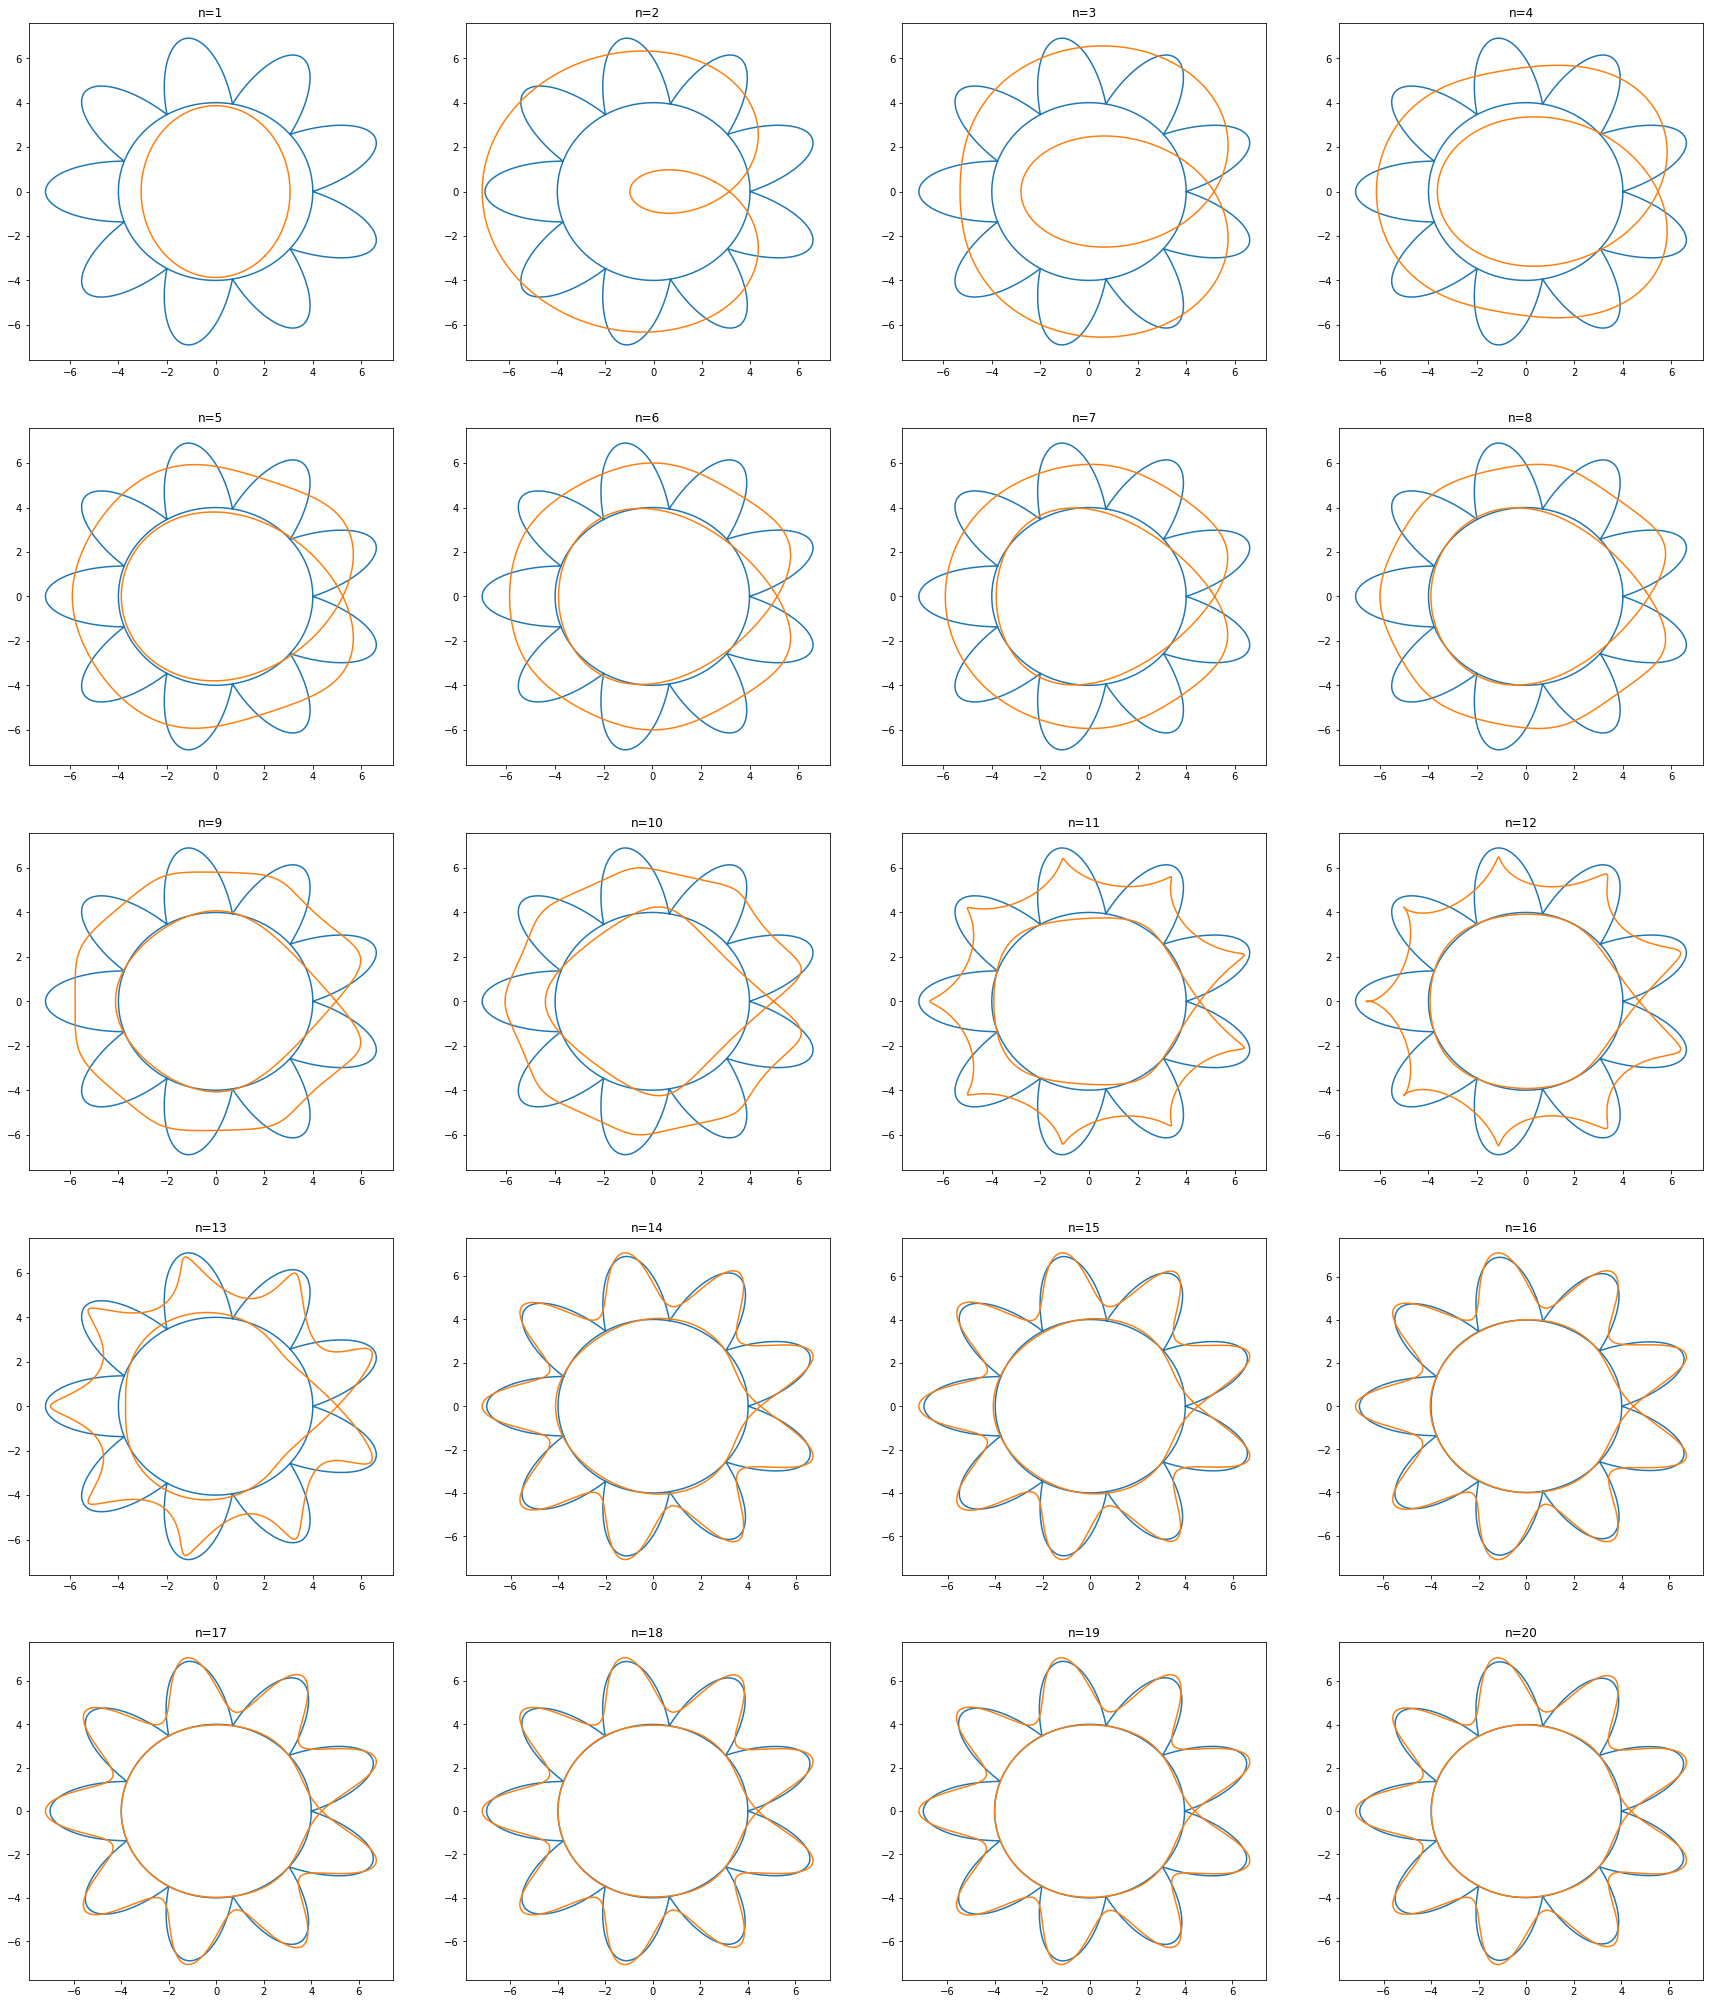

In [17]:
plt.figure(figsize=(30,36))

# Number of points
nT = 1000

t = 2 * np.pi * np.arange(0,1, 1/nT)

for n in range(1, N+1):
    pf = fcts[n-1](t)
    
    plt.subplot(5,4,n)
    plot_arcs(p,r1,r2,phi,theta1,theta2)
    plotcc(pf)
    plt.title(f"n={n}")

plt.show()